# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [2]:
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [4]:
employee = pd.read_csv('Employee.csv')
employee


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [5]:
# Method 1
mean_salary = employee.groupby('Department')['Salary'].mean()
print(mean_salary)


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [6]:
# Method 2
employee.pivot_table(index=["Department"], values="Salary", aggfunc="mean")


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
employee.pivot_table(index=["Department","Title"], values="Salary", aggfunc="mean")


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
employee.pivot_table(index=["Years","Title"], values="Salary", aggfunc="mean")


Salary
Years Title            
1     analyst        35
2     analyst        30
      associate      55
3     associate      55
4     analyst        35
7     associate      60
8     VP             70

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [9]:
grouped_data = employee.groupby(['Department', 'Title'])[['Salary']].agg(['mean', 'count'])
grouped_data

Salary      
                       mean count
Department Title                 
HR         VP          70.0     1
           analyst     32.5     2
IT         VP          70.0     1
           analyst     32.5     2
           associate   60.0     1
Sales      associate   55.0     2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [10]:
pivot_table_result = employee.pivot_table(index=["Department","Title"], values="Salary", aggfunc=(['median', 'min', 'max', 'std']))
pivot_table_result


median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [11]:
std_salary = pivot_table_result.stack().std()

pivot_table_result_filled = pivot_table_result.fillna(std_salary)
pivot_table_result_filled


median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  2.041241
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  2.041241
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  2.041241
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [12]:
grouped_data = employee.groupby('Department')[['Salary']].agg(['count', 'sum'])
grouped_data

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [13]:
grouped_data = employee.groupby(['Department', 'Title'])[['Years', 'Salary']].agg({'Years': 'sum', 'Salary': 'mean'})
grouped_data

Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [14]:
fitbit = pd.read_csv('Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [26]:
data_types = fitbit.dtypes

print(data_types)


Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [27]:
statistics = fitbit.describe(include='all')

print(statistics)

              Date  Calorie burned         Steps    Distance      Floors  \
count          367      367.000000    367.000000  367.000000  367.000000   
unique         366             NaN           NaN         NaN         NaN   
top     05-02-2016             NaN           NaN         NaN         NaN   
freq             2             NaN           NaN         NaN         NaN   
mean           NaN     2741.501362  10121.588556    8.549128   11.724796   
std            NaN      916.307036   5594.836225    3.409881   10.337370   
min            NaN      179.000000      0.000000    0.000000    0.000000   
25%            NaN     2698.000000   6730.500000    6.155000    5.000000   
50%            NaN     2974.000000  10413.000000    8.290000   11.000000   
75%            NaN     3233.000000  13916.500000   10.560000   16.000000   
max            NaN     4351.000000  26444.000000   20.450000  101.000000   

        Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count      

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [37]:
import numpy as np
from scipy.stats import pearsonr


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import pearsonr, spearmanr

pearsonr(fitbit["Minutes Very Active"], fitbit["Steps"])[0]

0.5714518481062599

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

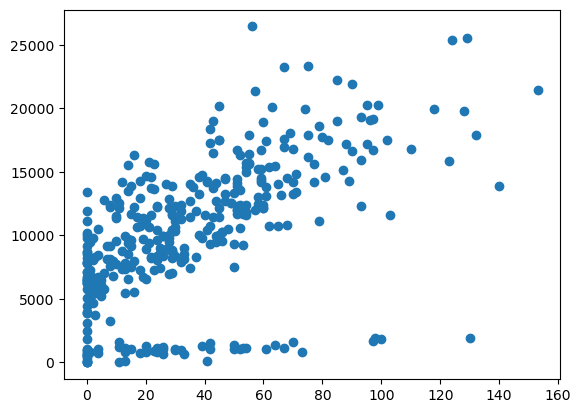

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
#There seems to be some correlation, even though it's not a very strong one


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [38]:
pearsonr(fitbit["Minutes Sedentary"], fitbit["Steps"])[0]

0.07690608062990095

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

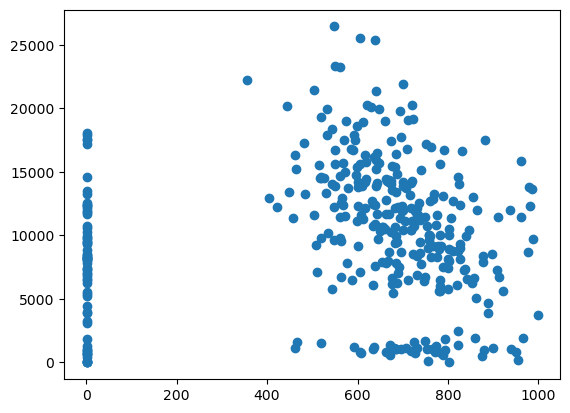

In [23]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

#I would say there is no correlation


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [39]:
pearsonr(fitbit["MinutesOfSleep"], fitbit["Steps"])[0]


0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

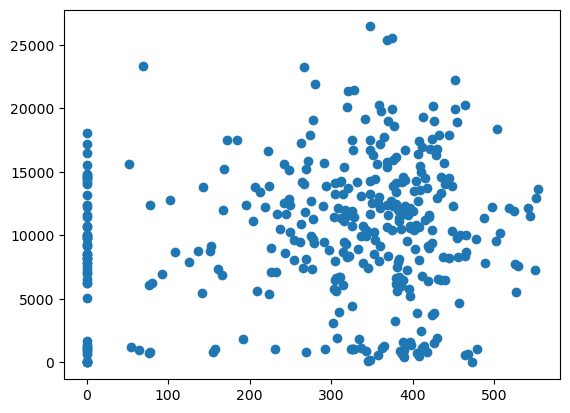

In [40]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#I would say there is no correlation


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [46]:
# your answer here



#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [44]:
time_grades = pd.read_csv('Time_Grades.csv')
time_grades


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

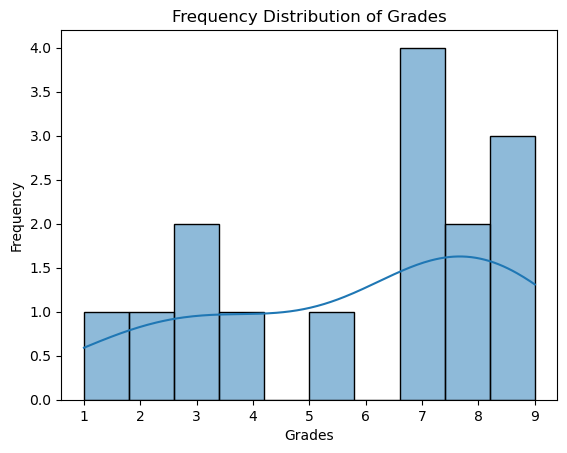

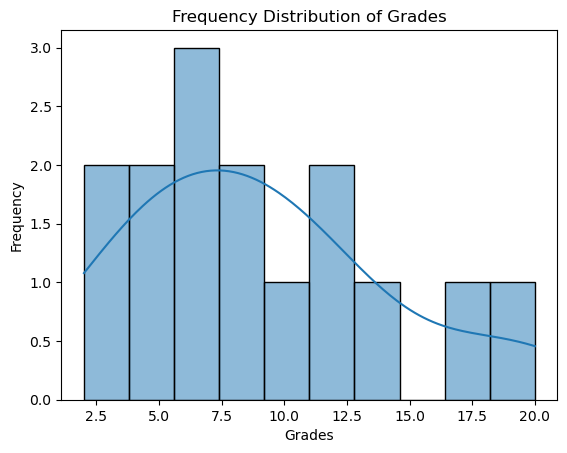

In [58]:
import seaborn as sns

sns.histplot(data=time_grades, x='Grade', kde=True, bins=10)
plt.title('Frequency Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=time_grades, x='Study time', kde=True, bins=10)
plt.title('Frequency Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [52]:
pearsonr(time_grades["Study time"], time_grades["Grade"])[0]


0.7980456073578859

In [53]:
spearmanr(time_grades["Study time"], time_grades["Grade"])[0]

0.819658753036942

In [ ]:
#There is a strong correlation between the Grades and Study time.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

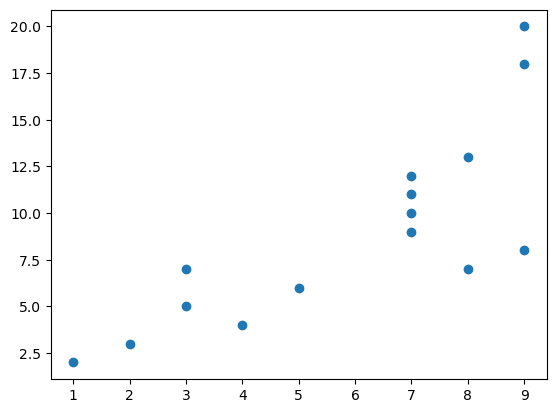

In [59]:
plt.scatter(x=time_grades['Grade'], y=time_grades['Study time'])

#They are highly correlated

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#PEARSON CORRELATION PROVIDES THE DIRECTION AND STRENGTH OF THE LINEAR RELATIONSHIP BETWEEN TWO VARIABLES

#THE SPEARMAN CORRELATION DOESN'T LOOK FOR A LINEAR RELATIONSHIP BUT RATHER A MONOTONIC RELATIONSHIP (IN THE SAME DIRECTION). IT DOES SO BY COMPARING THE RANK OF THE POINTS
